<h2><b><p align = 'center'>Monstrinho 6 - 
A liga ternária leve mais cara do mundo</p></h2>

<h4>
<b>Doscente:</b> Daniel Cassar<br>
<b>Disciplina:</b> Redes Neurais e Algoritmos Genéticos<br>
<b>Discentes:</b> Diogo Pereira, José David e Mayllon Emmanoel</h4>



<h3><b>Objetivo:</b> Encontre uma liga de três elementos que tenha o maior custo e o menor
p eso atômico. A liga ternária deve ser da forma xA.yB.zC sendo que x + y + z = 100 g,
x ≥5 g, y ≥5 g, z ≥5 g e "A", "B" e "C" são elementos químicos diferentes. Utilize o
preço dado no exercício anterior e peso atômico dados abaixo [3]. Considere que qualquer
composto com 3 elementos químicos é chamado de liga.</h3>

In [123]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h5><p align = 'justify'> A célula abaixo contém todas as funções necessárias para a resolução do experimento. É importante ressaltar que todas essas funções são adaptações das funções feitas por Daniel Cassar em seu material didático ATP-303 GA 5.2 - Notebook caixeiro viajante. <sup>[1]</sup></br></br>
Os processos mais adaptados ao problema são: </br></br>
<ul>
<b><li>Função objetivo:</b> realiza o cálculo do número de mols presentes em 100 gramas da liga e o preço desta. A função também penaliza o indivíduo caso alguma condição do problema não seja satisfeita. O fitness obtido é pelo produto entre o número de mols em 100g e o preço, de forma que materiais caros e leves acabem sendo mais valorizados.     </br> </br>
<b><li>Criação de canditados:</b> A criação de cada individuo da população é feita por meio do preenchimento de posições aleatórias de uma lista que inicialmente apenas contém zeros. O número de posições é definido por padrão na função como sendo 3. </br> </br>
<b><li>Cruzamento:</b> o cruzamento mantém o lógica de funcionamento do cruzamento uniforme, no entanto, apenas os genes que possuem valores diferentes de zero do pai e da mãe podem ser sorteados para os filhos.  </br></br>
<b><li>Mutação:</b> duas formas foram utilizadas, sendo estas a sucessiva e a por troca. Na sucessiva, todos os genes diferentes de zero tinham uma chance de ter uma aumento aleatório em seu valor. Enquanto na mutação por troca, um dos genes com valor diferente de 0 poderia ter seu valor trocado com qualquer outro gene aleatório, o que garante que outros elementos sejam testados de forma aleatória. </br></br>
</ul>
É muito importante ressaltar que as alterações feitas visaram, principalmente, evitar a criação de indivíduos inválidos. Para isso, a função <i>nonzero</i> do <i>Numpy</i> foi utilizada, esta que recebe uma lista e retorna uma lista de posições em que elementos são diferentes de zero.<sup>[3]<sup>   </p> </h5>



In [124]:
def criar_liga(n_genes,n_elementos=3):
   '''Cria individuo.

    Args:
      n_genes: número de genes que o indivíduo possui.
      n_elementos: número de elementos que irão compor a liga.
   ''' 
   posicoes_escolhidas = []
   liga = [0]*n_genes
   for _ in range(n_elementos):
      posicao = random.randint(0,n_genes-1)
      while posicao in posicoes_escolhidas:
         posicao = random.randint(0,n_genes-1)
      massa_do_elemento = random.randint(5,95)
      liga[posicao] = massa_do_elemento
      
   return liga


def populacao_de_ligas(populacao,n_genes):
   '''Cria população.

    Args:
      populacao: número de indivíduos da população.
      n_genes: número de genes que o indivíduo possui.
   ''' 
   ligas = []
   for _ in range(populacao):
      liga = criar_liga(n_genes)
      ligas.append(liga)
   return ligas
   
def objetivo_liga(inf,indv):
   '''Calcula fitness do indivíduo.
   
    Args:
      inf: dicionário com informações sobre cada elemento.
      indv: lista que representa o indivíduo.
   '''
    
    
   conversao_massa_massa_atomica = inf['Massa Atômica (g/mol)']
   precos_elementos = inf['Preço(dolar/grama)']
   
   massas = np.array(indv)*100/sum(indv)
   n_mol= sum(massas/conversao_massa_massa_atomica)
   preco = sum(massas*precos_elementos)
   if sum(massas) != 100 or np.min(massas[massas!=0])<5 or len(massas[massas!=0])!=3 :
      return 0
   
   return preco*n_mol

   
def funcao_objetivo_liga_pop_ligas(populacao,inf): 
   '''Calcula fitness da população.
   
    Args:
      populacao: lista de indivíduos da população.
      inf: dicionário com informações sobre cada elemento.
      
   '''
   fitness =[]
   
   for individuo in populacao:
      fitness.append(objetivo_liga(inf,individuo))
   
   return fitness


def selecao_torneio_max(populacao, fitness, tamanho_torneio):
    """Faz a seleção de uma população usando torneio.

    Nota: da forma que está implementada, só funciona em problemas de
    maximização.

    Args:
      populacao: lista contendo os individuos do problema
      fitness: lista contendo os valores computados da funcao objetivo
      tamanho_torneio: quantidade de invíduos que batalham entre si

    """
    selecionados = []

    for _ in range(len(populacao)):
        sorteados = random.sample(populacao, tamanho_torneio)

        fitness_sorteados = []
        for individuo in sorteados:
            indice_individuo = populacao.index(individuo)
            fitness_sorteados.append(fitness[indice_individuo])

        max_fitness = max(fitness_sorteados)
        indice_max_fitness = fitness_sorteados.index(max_fitness)
        individuo_selecionado = sorteados[indice_max_fitness]

        selecionados.append(individuo_selecionado)

    return selecionados
   
def mutacao_troca_nao_nulo(populacao, chance_de_mutacao):
    """Aplica mutacao de troca em um indivíduo.

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação

    """
    for individuo in populacao:
        if random.random() < chance_de_mutacao:
            non_zero_positions = np.nonzero(individuo)[0]

            qualquer_posicao = random.randint(0, len(non_zero_positions)-1)
            gene1 = non_zero_positions[qualquer_posicao]
            gene2 = random.randint(0, len(individuo) - 1)
            while gene1 == gene2:
                gene1 = random.randint(0, len(individuo) - 1)
                gene2 = random.randint(0, len(individuo) - 1)

            individuo[gene1], individuo[gene2] = (
                individuo[gene2],
                individuo[gene1],
            )
            
def mutacao_sucessiva(
    populacao, chance_de_mutacao, chance_mutacao_gene
):
    """Faz com que os valores presentes nos genes não nulos possam aumentar.

    Args:
      populacao: lista contendo os indivíduos do problema
      chance_de_mutacao: float entre 0 e 1 representando a chance de mutação
      chance_mutacao_gene: float entre 0 e 1 representando a chance de mutação de cada gene
      valor_max: inteiro represtando o valor máximo das caixas

    """
    for individuo in populacao:
        
        if random.random() < chance_de_mutacao:
            genes = np.nonzero(individuo)[0]
            for gene in genes:
                if random.random() < chance_mutacao_gene:
                    individuo[gene] += random.randint(10,30)


def cruzamento_uniforme_de_nao_zeros(pai, mae, chance_de_cruzamento):
    """Realiza cruzamento uniforme, mas apenas utilizando com os genes valor diferente de 0.

    Args:
      pai: lista representando um individuo.
      mae: lista representando um individuo.
      chance_de_cruzamento: float entre 0 e 1 representando a chance de cruzamento.

    """
    if random.random() < chance_de_cruzamento:
        filho1 = [0]*len(pai)
        filho2 = [0]*len(pai)
        
        genes_pai = np.nonzero(pai)[0]
        genes_mae = np.nonzero(mae)[0]

        for i in range(len(genes_mae)):
            if random.choice([True, False]):
                filho1[genes_pai[i]] = pai[genes_pai[i]]
                filho2[genes_mae[i]] = mae[genes_mae[i]]
            else:
                filho2[genes_pai[i]] = pai[genes_pai[i]]
                filho1[genes_mae[i]] = mae[genes_mae[i]]

        return filho1, filho2
    else:
        return pai, mae
     
     
def exibir_dados(inf,indv):
    """Exibe informações sobre a liga.

    Args:
      inf: dicionário com informações sobre cada elemento.
      indv: lista que representa o indivíduo.

    """
    elementos = inf['Elemento']
    conversao_massa_massa_atomica = inf['Massa Atômica (g/mol)']
    precos_elementos = inf['Preço(dolar/grama)']
    massas = np.array(indv)*100/sum(indv)
    n_mol= massas/conversao_massa_massa_atomica
    preoco = sum(np.array(massas)*np.array(precos_elementos))

    dicoinario_de_massas = {chave: round(valor, 3) for chave, valor in dict(zip(elementos, massas)).items() if valor != 0}
    dicoinario_de_m_atomicas = {chave: round(valor, 3) for chave, valor in dict(zip(elementos, n_mol)).items() if valor != 0}
    n_mols_elementos = sum(list(dicoinario_de_m_atomicas.values()))
    print(f'Massas usadas\n{dicoinario_de_massas} (g)\n')
    print(f'Número de mols de cada elemento\n{dicoinario_de_m_atomicas}\n')
    print(f'Massa molar da liga:\n{round(100/n_mols_elementos,3)} (g/mol)\n')
    print(f'Número de mols em 100g:\n{round(n_mols_elementos,3)}\n')
    print(f'Preço por 100g:\n{preoco} dolares\n')
    print(f'Preço vezes número de mols:\n{preoco*sum(n_mol)}')


<h5><p align = 'justify'>Para conseguir deixar a lista na horizontal, realizei um processamento com os dados, copiando e colocando os dicionários fornecidos em uma célula <i>Python</i>, convertendo para dicionário, exibindo este pela função <i>print</i> e pedindo para que a IA ChatGPT colocasse as listas presentes no dicionário na horizontal.<sup>[2]</sup> Também deixei o preço em dolar por grama. </p> </h5>

In [125]:
#df = pd.read_excel('Dados_dos_elementos.xlsx')
#df.to_dict(orient='list')
informacoes_dos_elementos = {
  'Elemento': ['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf'],
  'Preço(dolar/grama)': [0.00139, 0.024, 0.0856, 0.857, 0.00368, 0.000122, 0.00014, 0.000154, 0.00216, 0.24, 0.00343, 0.00232, 0.00179, 0.0017, 0.00269, 9.26e-05, 8.2e-05, 0.0009310000000000001, 0.0136, 0.00235, 3.46, 0.0117, 0.385, 0.0094, 0.00182, 0.000424, 0.0328, 0.0139, 0.006, 0.00255, 0.148, 1.01, 0.00131, 0.0214, 0.00439, 0.29, 15.5, 0.006679999999999999, 0.031, 0.0856, 0.0401, 100.0, 10.6, 147.0, 49.5, 0.521, 0.00273, 0.167, 0.0187, 0.00579, 0.0635, 0.035, 1.8, 61.8, 0.000275, 0.00492, 0.00471, 0.103, 0.0575, 460.0, 0.0139, 0.0314, 0.0286, 0.658, 0.307, 0.0571, 0.0264, 3.0, 0.0171, 0.643, 0.9, 0.312, 0.0353, 4.15, 12.0, 56.2, 27.8, 0.0302, 4.2, 0.002, 0.00636, 49200000000.0, 29000000000.0, 0.287, 280.0, 0.101, 660.0, 6490.0, 750.0, 160000000.0, 185000000.0, 185000000.0],
  'Massa Atômica (g/mol)': [1.008, 4.002602, 6.94, 9.0121831, 10.81, 12.011, 14.007, 15.999, 18.998403163, 20.1797, 22.98976928, 24.305, 26.9815385, 28.085, 30.973761998, 32.06, 35.45, 39.948, 39.0983, 40.078, 44.955908, 47.867, 50.9415, 51.9961, 54.938044, 55.845, 58.933194, 58.6934, 63.546, 65.38, 69.723, 72.63, 74.921595, 78.971, 79.904, 83.798, 85.4678, 87.62, 88.90584, 92.90637, 95.95, 97.90721, 101.07, 102.9055, 106.42, 107.8682, 112.414, 114.818, 118.71, 121.76, 127.6, 126.90447, 131.293, 132.90545196, 137.327, 138.90547, 140.116, 140.90766, 144.242, 144.91276, 150.36, 151.964, 157.25, 158.92535, 162.5, 164.93033, 167.259, 168.93422, 173.045, 174.9668, 178.49, 180.94788, 183.84, 186.207, 190.23, 192.217, 195.084, 200.592, 204.38, 207.2, 208.9804, 209.0, 227.0, 232.0377, 231.03588, 238.02891, 237.0, 244.0, 243.0, 247.0, 247.0, 251.0]
}

<h5><p align = 'justify'> Na célula abaixo, as constantes a serem utilizada são definidas.</p> </h5>

In [126]:
NUM_LIGAS = 200
N_GENES = len(informacoes_dos_elementos['Elemento'])
NUM_GERACOES = 1000
CHANCE_DE_CRUZAMENTO = 0.5
CHANCE_DE_MUTACAO = 0.05
CHANCE_DE_MUTACAO_GENE = 0.1
TAMANHO_TORNEIO = 5

<h5><p align = 'justify'> As etapas da evolução são realizadas na célula abaixo.</p> </h5>

In [127]:
populacao = populacao_de_ligas(NUM_LIGAS,N_GENES)
hall_da_fama = []
menores_fit =[]
for n in range(NUM_GERACOES):
    print(f'Geração {n+1} de {NUM_GERACOES}',end='\r')  #Apenas para ver o progresso
    # Seleção
    fitness = funcao_objetivo_liga_pop_ligas(populacao,informacoes_dos_elementos)        
    selecionados = selecao_torneio_max(populacao, fitness, TAMANHO_TORNEIO)
    
    # Cruzamento
    proxima_geracao = []
    for pai, mae in zip(selecionados[::2], selecionados[1::2]):
        individuo1, individuo2 = cruzamento_uniforme_de_nao_zeros(pai, mae, CHANCE_DE_CRUZAMENTO)
        proxima_geracao.append(individuo1)
        proxima_geracao.append(individuo2)                                                
    
    # Mutação
    mutacao_troca_nao_nulo(proxima_geracao, CHANCE_DE_MUTACAO)
    mutacao_sucessiva(proxima_geracao,CHANCE_DE_MUTACAO,CHANCE_DE_MUTACAO_GENE)
                                                                                                                                                                        
    # Atualização do hall da fama
    fitness = funcao_objetivo_liga_pop_ligas(populacao,informacoes_dos_elementos) 
        
    maior_fitness = max(fitness)
    menores_fit.append(maior_fitness)
    indice = fitness.index(maior_fitness)
    hall_da_fama.append(proxima_geracao[indice])    
    
    # Encerramento
    populacao = proxima_geracao

<h5><p align = 'justify'> Para conferir o desempenho do melhor indivídio de cada geração e compreender o quão rapidamente o algoritmo genético encontra um bom indivíduo, exibimos o gráfico abaixo.</p> </h5>

[]

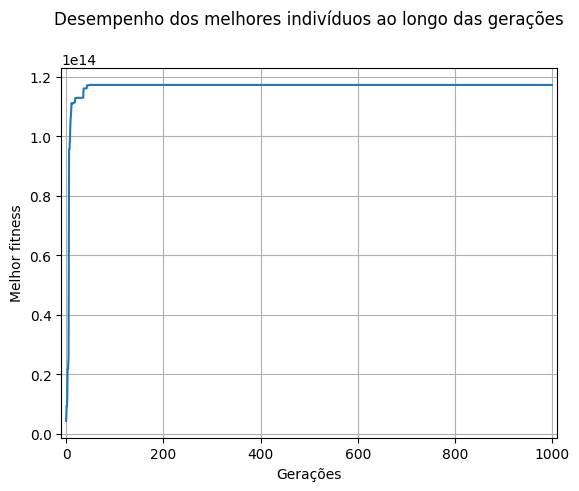

In [128]:
geracoes = np.arange(0,NUM_GERACOES)
plt.grid()
plt.plot(geracoes,menores_fit)
plt.xlabel('Gerações')
plt.ylabel('Melhor fitness')
inicio_observado = 0
plt.xlim([inicio_observado-10,NUM_GERACOES+10])
plt.title('Desempenho dos melhores indivíduos ao longo das gerações\n')
plt.plot()

In [129]:
exibir_dados(informacoes_dos_elementos,hall_da_fama[-1])

Massas usadas
{'H': 50.935, 'Po': 43.925, 'Ac': 5.14} (g)

Número de mols de cada elemento
{'H': 50.53, 'Po': 0.21, 'Ac': 0.023}

Massa molar da liga:
1.97 (g/mol)

Número de mols em 100g:
50.763

Preço por 100g:
2310186915887.9214 dolares

Preço vezes número de mols:
117272363374212.92


<p align = 'justify '> <b><h3>Referências:</h3></b>

‌[1] Daniel Cassar. ATP-303 GA 5.2 - Notebook do caixeiro viajante. 

[2] ChatGPT. Disponível em: <https://chatgpt.com/share/ce4ffd0f-050a-4466-b5ad-8c54e59e42a0>. Acesso em: 10 jun. 2024.

‌[3] numpy.nonzero — NumPy v1.24 Manual. Disponível em: <https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html>. Acesso em: 9 jun. 2024.

‌